In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from scipy.stats import ttest_1samp

In [2]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False
plt.rcParams['axes.facecolor']='white'

In [3]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## RTqPCR

In [4]:
qpcr = pd.read_excel("../../resources/LDLvar/characterization/0823_LDLvar_RTqPCR_summary.xlsx")

In [5]:
qpcr["LFC of edited sample"] = ["rs35081008; ZNF329", "rs8126001; OPRL1", "rs8216001; RGS19", "rs704; VTN"]
qpcr = qpcr.set_index("LFC of edited sample", drop=True)

In [29]:
qpcr = qpcr.loc[[ "rs35081008; ZNF329", "rs8126001; OPRL1", "rs8216001; RGS19", "rs704; VTN",]]

In [30]:
qpcr_plot = pd.melt(qpcr.reset_index(), id_vars=["LFC of edited sample"]).rename(columns={"LFC of edited sample":"variant", "value":"LFC"})

In [31]:
ps_pcr = ttest_1samp(qpcr, 0, axis=1, nan_policy='omit').pvalue

In [32]:
cbpal = sns.color_palette("colorblind")

In [33]:
pal = {"rs35081008; ZNF329":cbpal[-1],
      "rs8126001; OPRL1":cbpal[-2],
      "rs8216001; RGS19":cbpal[-2],
       "rs704; VTN":cbpal[2]}

0
1
2
3


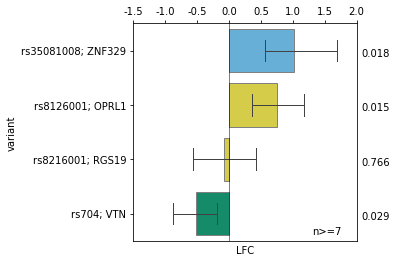

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(
    qpcr_plot, x = "LFC", y = "variant",
    capsize=.4, errwidth=1, edgecolor=".5", ax = ax, hue = 'variant', palette=pal, dodge=False
)
ax.set_xlim((-1.5, 2))
ax.get_legend().remove()
for i, (v, row) in enumerate(qpcr.iterrows()):
    print(i)
    ax.text(1.02, 0.85-0.25*i, f"{ps_pcr[i]:.3f}", transform=ax.transAxes)
ax.xaxis.tick_top()
ax.text(0.8, 0.03, f"n>=7", transform=ax.transAxes)
ax.axvline(0, color='black', linewidth=0.5)
fig.savefig("4f_rtqpcr_v2.pdf")

## CRISPRa/i

In [36]:
crisprai = pd.read_csv("../../resources/LDLvar/characterization/CRISPRai_combined.csv").rename(columns={"Unnamed: 0":"target", "CRISPRa":"CRISPRa.0", "CRISPRi":"CRISPRi.0"}).set_index("target")

In [37]:
pd.set_option('display.max_columns', 500)

In [38]:
crisprai

,CRISPRa.0,CRISPRa.1,CRISPRa.2,CRISPRa.3,CRISPRa.4,CRISPRa.5,CRISPRa.6,CRISPRa.7,CRISPRa.8,CRISPRa.9,CRISPRa.10,CRISPRa.11,CRISPRi.0,CRISPRi.1,CRISPRi.2,CRISPRi.3,CRISPRi.4,CRISPRi.5,CRISPRi.6,CRISPRi.7,CRISPRi.8,CRISPRi.9,CRISPRi.10,CRISPRi.11
target,,,,,,,,,,,,,,,,,,,,,,,,
Control,-0.27,-0.16,0.03,0.21,0.11,0.04,-0.30,0.15,0.15,0.01,0.06,-0.12,-0.03,-0.08,-0.09,0.05,0.03,0.11,NaN,NaN,NaN,NaN,NaN,NaN
OPRL1/RGS19,-0.31,-0.35,-0.27,-0.41,-0.19,-0.38,0.64,0.68,0.65,0.57,0.54,0.59,-0.10,-0.23,-0.25,-0.26,-0.21,-0.14,NaN,NaN,NaN,NaN,NaN,NaN
VTN,0.69,0.56,0.63,0.74,0.68,0.69,0.94,0.78,0.83,0.96,1.07,0.86,-0.18,-0.59,-0.58,-0.66,-0.48,-0.52,NaN,NaN,NaN,NaN,NaN,NaN
ZNF329,0.91,1.00,1.15,0.99,1.01,1.11,1.08,0.78,0.90,0.99,0.87,1.12,-0.25,-0.17,0.07,-0.14,0.04,-0.06,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
crisprai = crisprai.loc[["ZNF329", "OPRL1/RGS19", "VTN", "Control"]].reset_index()

In [40]:
crispr_plot = pd.wide_to_long(crisprai, ["CRISPRa.", "CRISPRi."], i = "target", j = "rep", suffix='\d+').rename(columns={"CRISPRa.":"CRISPRa", "CRISPRi.":"CRISPRi"}).reset_index()

In [41]:
crispr_plot

,target,rep,CRISPRa,CRISPRi
0,ZNF329,0,0.91,-0.25
1,OPRL1/RGS19,0,-0.31,-0.10
2,VTN,0,0.69,-0.18
3,Control,0,-0.27,-0.03
4,ZNF329,1,1.00,-0.17
5,OPRL1/RGS19,1,-0.35,-0.23
6,VTN,1,0.56,-0.59
7,Control,1,-0.16,-0.08
8,ZNF329,2,1.15,0.07
9,OPRL1/RGS19,2,-0.27,-0.25


In [42]:
crispr_plot = pd.melt(crispr_plot, id_vars = ['target', 'rep'])
crispr_plot.columns=['target', 'rep', 'perturbation', 'LDL-C uptake LFC']

In [43]:
cbpal

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [44]:
target_pal = {
    "ZNF329":cbpal[-1],
    "OPRL1/RGS19":cbpal[-2],
    "VTN":cbpal[2],
    "Control":cbpal[-3]
}

In [45]:
clr = [cbpal[0], cbpal[3]]

In [46]:
pert_pal = {"CRISPRa":cbpal[3], "CRISPRi":cbpal[0]}

In [47]:
pal = sns.color_palette()

In [48]:
crispra = crisprai.set_index("target").iloc[:, :12]
crispri = crisprai.set_index("target").iloc[:, 12:]

In [49]:
crispra

,CRISPRa.0,CRISPRa.1,CRISPRa.2,CRISPRa.3,CRISPRa.4,CRISPRa.5,CRISPRa.6,CRISPRa.7,CRISPRa.8,CRISPRa.9,CRISPRa.10,CRISPRa.11
target,,,,,,,,,,,,
ZNF329,0.91,1.00,1.15,0.99,1.01,1.11,1.08,0.78,0.90,0.99,0.87,1.12
OPRL1/RGS19,-0.31,-0.35,-0.27,-0.41,-0.19,-0.38,0.64,0.68,0.65,0.57,0.54,0.59
VTN,0.69,0.56,0.63,0.74,0.68,0.69,0.94,0.78,0.83,0.96,1.07,0.86
Control,-0.27,-0.16,0.03,0.21,0.11,0.04,-0.30,0.15,0.15,0.01,0.06,-0.12


In [50]:
crispri

,CRISPRi.0,CRISPRi.1,CRISPRi.2,CRISPRi.3,CRISPRi.4,CRISPRi.5,CRISPRi.6,CRISPRi.7,CRISPRi.8,CRISPRi.9,CRISPRi.10,CRISPRi.11
target,,,,,,,,,,,,
ZNF329,-0.25,-0.17,0.07,-0.14,0.04,-0.06,NaN,NaN,NaN,NaN,NaN,NaN
OPRL1/RGS19,-0.10,-0.23,-0.25,-0.26,-0.21,-0.14,NaN,NaN,NaN,NaN,NaN,NaN
VTN,-0.18,-0.59,-0.58,-0.66,-0.48,-0.52,NaN,NaN,NaN,NaN,NaN,NaN
Control,-0.03,-0.08,-0.09,0.05,0.03,0.11,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ps_crispra = ttest_1samp(crispra, 0, axis=1, nan_policy='omit').pvalue
ps_crispri = ttest_1samp(crispri, 0, axis=1, nan_policy='omit').pvalue

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


0
1
2
3


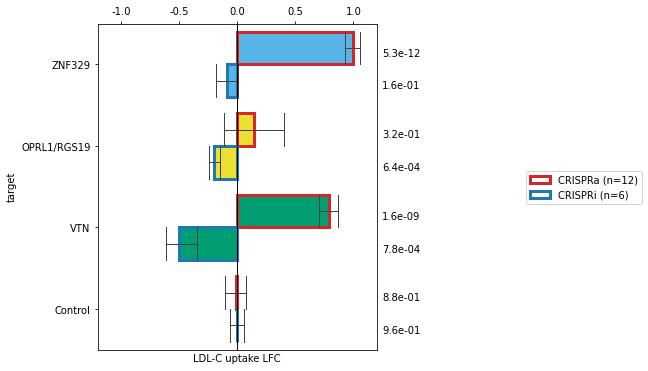

In [52]:
fig, ax = plt.subplots(figsize=(5,6))
t_ax = sns.barplot(
    crispr_plot, x = "LDL-C uptake LFC", y = "target",
    capsize=.4, errwidth=1, hue = "perturbation", dodge=True, orient='h'
)
target_col = crispr_plot.target.map(target_pal)
pert_col = [pal[3], pal[0]]
for i, patch in enumerate(t_ax.patches):
    patch.set_facecolor(target_col[i])
    patch.set_edgecolor(pert_col[i//4])
ax.axvline(0, color="black", linewidth=1)
plt.setp(t_ax.patches, linewidth=3)  
ax.get_legend().remove()
legend_elements = [Patch(facecolor='none', edgecolor=pert_col[0], linewidth=3,
                         label='CRISPRa (n=12)'),
                  Patch(facecolor='none', edgecolor=pert_col[1], linewidth=3,
                         label='CRISPRi (n=6)'),]
ax.xaxis.tick_top()
ax.set_xlim((-1.2, 1.2))
for i, (v, row) in enumerate(qpcr.iterrows()):
    print(i)
    ax.text(1.02, 0.9-0.25*i, f"{ps_crispra[i]:.1e}", transform=ax.transAxes)
    ax.text(1.02, 0.9-0.25*i-0.1, f"{ps_crispri[i]:.1e}", transform=ax.transAxes)
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.3, 0.5))

fig.savefig("CRISPRai_v2.pdf", bbox_inches="tight")